### XGBoost

GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklendirilebilir ve farklı platformlara entegre edilebilir versiyonudur.

Tiangi Chen 2014

In [19]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

In [6]:
xgboost_model = XGBClassifier(random_state=17)

In [7]:
cv_results = cross_validate(xgboost_model,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

In [8]:
cv_results['test_accuracy'].mean()

0.7526525761819879

In [9]:
cv_results['test_f1'].mean()

0.6317893713482235

In [10]:
cv_results['test_roc_auc'].mean()

0.7987134870719776

In [11]:
xgboost_params = {"learning_rate":[0.1,0.01],
                  "max_depth":[5,8,None],
                  "n_estimators":[100,500,1000],
                  "colsample_bytree":[None,0.7,1]}

In [12]:
xgboost_best_grid = GridSearchCV(xgboost_model,xgboost_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [13]:
xgboost_best_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [14]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_,random_state=17).fit(X,y)

In [15]:
cv_results = cross_validate(xgboost_final,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

In [16]:
cv_results["test_accuracy"].mean()

0.7578643578643579

In [17]:
cv_results["test_f1"].mean()

0.6297649135382188

In [18]:
cv_results["test_roc_auc"].mean()

0.8145597484276731

In [20]:
def plot_importance(model,features,num=len(X),save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,"Feature": features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig("importances.png")

In [22]:
# Feature Importance bölümü

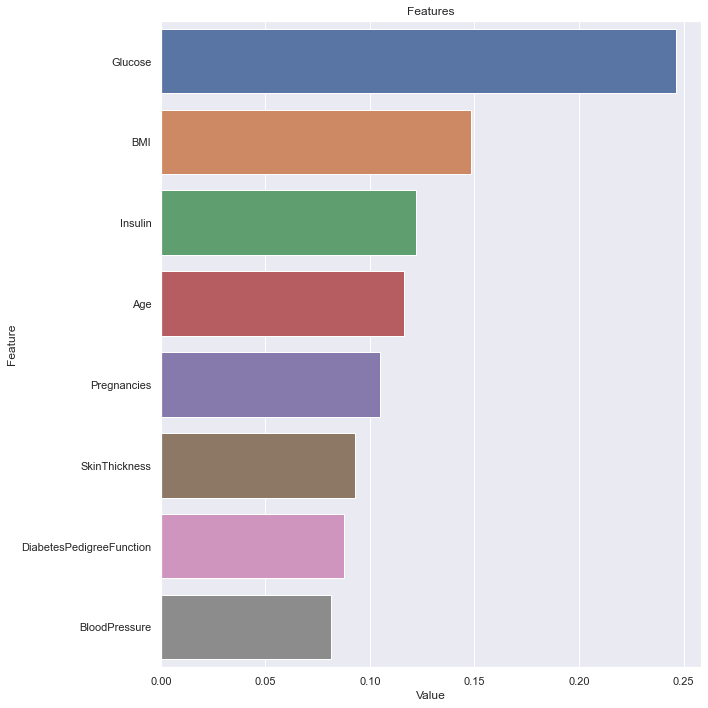

In [21]:
plot_importance(xgboost_final,X)